# <h1 align="center">Student Evaluation for Thermonuclear Supernova Classification via their Multi-Wavelength Signatures</h1>

<h3 align="center">By Alexandros P. Pouroullis</h3>

<h2><ins>Step 1</ins></h2>
<font size="3">Identifying relationships between the 3 observable parameters</font>

In [70]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")

I'll first begin by parsing the contents of the text file. <br>
<p>
    For reference:<br>
    &nbsp; Observable Parameters: <br>
    &emsp;Column 1: $\tau$ (unitless) where $\tau$ is the initial optical depth (higher = more opaque medium)<br>
    &emsp;Column 2: Uncertainty in $\tau$<br>
    &emsp;Column 3: V<sub>max</sub> (s<sup>-1</sup>) where V<sub>max</sub> is the maximum expansion velocity of the ejecta<br>
    &emsp;Column 4: Uncertainty in V<sub>max</sub><br>
    &emsp;Column 5: $\Phi$<sub>300</sub> (photons.cm<sup>-2</sup>.s<sup>-1</sup>) where $\Phi$<sub>300</sub> is the emergent flux of gamma-rays at 300 days post-explosion within the energy band 2 to 4 MeV (10<sup>6</sup><br> &emsp;electronvolts) and at a supernova distance of 20 Mpc (10<sup>6</sup> parsecs).<br>
    &nbsp;Physical Parameters:<br>
    &emsp;Column 6: Total mass ($M_\odot$ – Solar Mass)<br>
    &emsp;Column 7: Mass <sup>56</sup>Ni ($M_\odot$)<br>
    &emsp;Column 8: Explosion energy (10<sup>51</sup> ergs, where 1 erg=10<sup>-7</sup>J)<br>
    &emsp;Column 9: Initial SNeIa mass distribution flag<br>
    &emsp;Column 10: Initial <sup>56</sup>Ni radial distribution flag<br>
</p>
    

In [38]:
observable_parameters_dict = {"tau":[], "tau_uncertainty":[], "vmax":[], "vmax_uncertainty":[], "emergent_flux":[]}


df = pd.read_csv("datacube.txt", sep=' ', header=None, float_precision=None)
# Shuffling data. Setting the 'drop' parameter to True in reset_index() stops pandas from including the previous
# index as a new column in the shuffled dataframe. 
df = df.sample(frac=1).reset_index(drop=True)
df.columns = ['tau', 'tau_uncertainty', 'vmax', 'vmax_uncertainty', 'emergent_flux', 
                'total_mass', 'mass_nickel56', 'explosion_energy', 'initial_mass_distribution_flag', 
                'initial_nickel56_distribution_flag']
obs_params = ['tau', 'tau_uncertainty', 'vmax','vmax_uncertainty', 'emergent_flux']
uncertainty_params = ['tau_uncertainty', 'vmax_uncertainty']
phys_params = ['total_mass', 'mass_nickel56', 'explosion_energy', 
                        'initial_mass_distribution_flag', 'initial_nickel56_distribution_flag']
# splitting the dataframe into two dataframes where one contains the observable and the 
# other the physical parameters.
obs_df = df.loc[:, obs_params]
phys_df = df.loc[:, phys_params]

# previewing the dataframe containing the observable parameters of the first 5 records
obs_df.head()

,tau,tau_uncertainty,vmax,vmax_uncertainty,emergent_flux
0,2.204022,0.221535,0.013156,0.000588,0.000003
1,2.633232,0.156929,0.010818,0.000411,0.000011
2,3.380236,0.223446,0.013013,0.000476,0.000011
3,2.656983,0.178043,0.011899,0.000490,0.000011
4,3.269608,0.219045,0.013098,0.000512,0.000011


I begin with univariate data analysis of the observable parameters.

In [78]:
obs_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tau,512.0,2.576275,0.391005,1.661535,2.321794,2.559251,2.812090,3.621963
tau_uncertainty,512.0,0.198927,0.021055,0.133992,0.183659,0.198672,0.215768,0.239162
vmax,512.0,0.012814,0.000849,0.009842,0.012372,0.012891,0.013388,0.014723
vmax_uncertainty,512.0,0.000512,0.000074,0.000313,0.000458,0.000501,0.000556,0.000817
emergent_flux,512.0,0.000007,0.000004,0.000003,0.000003,0.000006,0.000011,0.000015


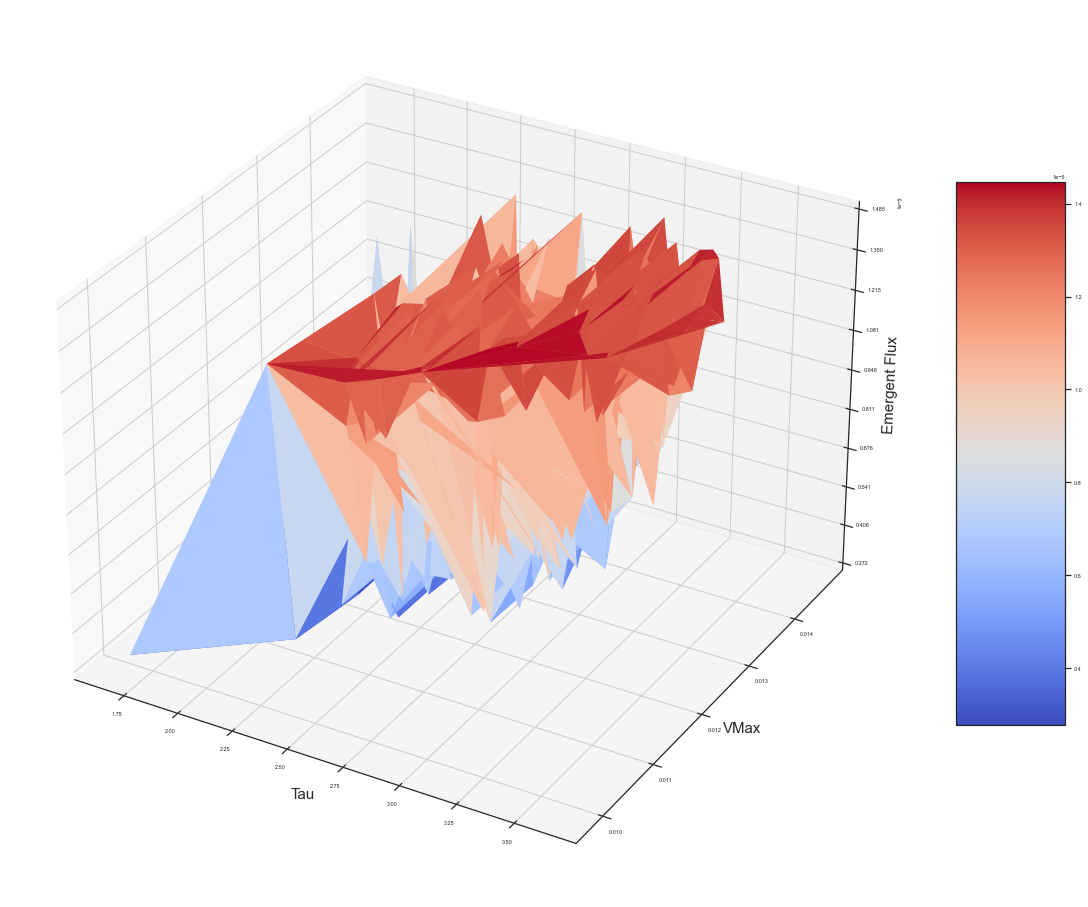

In [71]:
fig, ax = plt.subplots(subplot_kw={"projection":"3d"})
X = obs_df["tau"]
Y = obs_df["vmax"]
Z = obs_df["emergent_flux"]

surf = ax.plot_trisurf(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=True)
ax.set_xlabel("Tau", fontsize=15)
ax.set_ylabel("VMax", fontsize=15)
ax.set_zlabel("Emergent Flux", fontsize=15)

ax.zaxis.set_major_locator(LinearLocator(10))
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Here, I create functions to create custom plots using matplotlib for plotting individual variables.

In [48]:
def scatter_plot(x, y, ax, param):
    """Produces a custom labeled scatter plot using matplotlib"""
    ax.scatter(x, y, alpha=0.4)
#     ax.set_title("Scatter Plot of " + param, fontsize=20)
#     ax.set_xlabel("Index of Sample", fontsize=15)
#     ax.set_ylabel(param, fontsize=15)
    return ax

def histogram(x, ax, param, nbins):
    """Produces a custom labeled histogram using matplotlib"""
    ax.hist(x, bins=nbins)
#     ax.set_title("Distribution of " + param, fontsize=20)
#     ax.set_xlabel(param, fontsize=15)
#     ax.set_ylabel("Count", fontsize=15)
    return ax

def violinplot(x, ax, param):
    """Produces a horizontal box and whisker diagram using matplotlib"""
    # setting vert to False produces a horizontal box and whisker diagram
    ax.violinplot(x, vert=False, showmedians=True)
#     ax.set_title("Violin Plot of " + param, fontsize=20)
#     ax.set_ylabel(param, fontsize=15)
    return ax

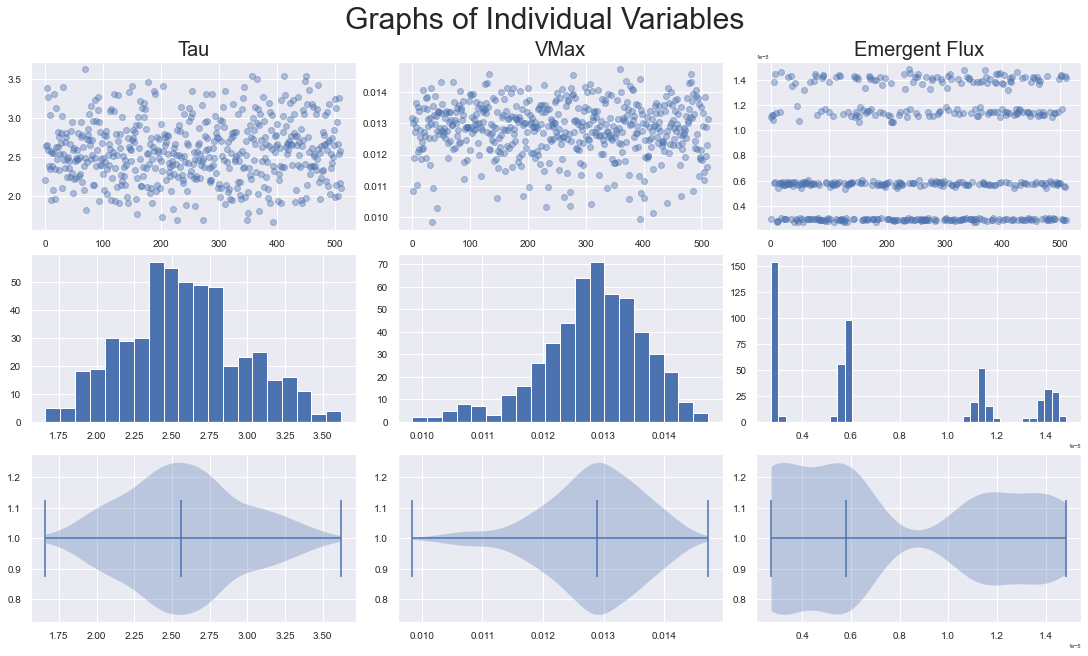

In [58]:
fig, ax = plt.subplots(nrows=3, ncols=3,constrained_layout=True)
fig.set_size_inches(15, 9)
fig.suptitle("Graphs of Individual Variables", fontsize=30)

for axes in ax.flatten():
    axes.tick_params(axis='x', labelsize=10)
    axes.tick_params(axis='y', labelsize=10)

ax[0, 0].set_title("Tau", fontsize=20)

ax[0, 1].set_title("VMax", fontsize=20)

ax[0, 2].set_title("Emergent Flux", fontsize=20)

scatter_plot(obs_df.index, obs_df["tau"], ax[0, 0], "Tau")
scatter_plot(obs_df.index, obs_df["vmax"], ax[0, 1], "Vmax")
scatter_plot(obs_df.index, obs_df["emergent_flux"], ax[0, 2], "Emergent Flux")


histogram(obs_df["tau"], ax[1, 0], "Tau", 20)
histogram(obs_df["vmax"], ax[1, 1], "Vmax", 20)
histogram(obs_df["emergent_flux"], ax[1, 2], "Emergent Flux", 40)

violinplot(obs_df["tau"], ax[2, 0], "Tau")
violinplot(obs_df["vmax"], ax[2, 1], "Vmax")
violinplot(obs_df["emergent_flux"], ax[2, 2], "Emergent Flux");

Some important details immediately become evident. 
<br>
Tau seems to be quite randomly distributed, though there is some concentration in the range of 2.3 to 2.8, with the most prominent band being ~2.4. 
<br>
Vmax is more clearly concentrated at ~0.013.
<br>
Emergent flux appears to be the most interesting: it's clearly split into 4 narrow bands, 0.2, 0.6, 1.15 and 1.4 ( all on the scale 1e-5).

In [132]:
obs_df.loc[:, ~obs_df.columns.isin(uncertainty_params)].corr()

,tau,vmax,emergent_flux
tau,1.000000,0.139121,0.632440
vmax,0.139121,1.000000,-0.256229
emergent_flux,0.632440,-0.256229,1.000000


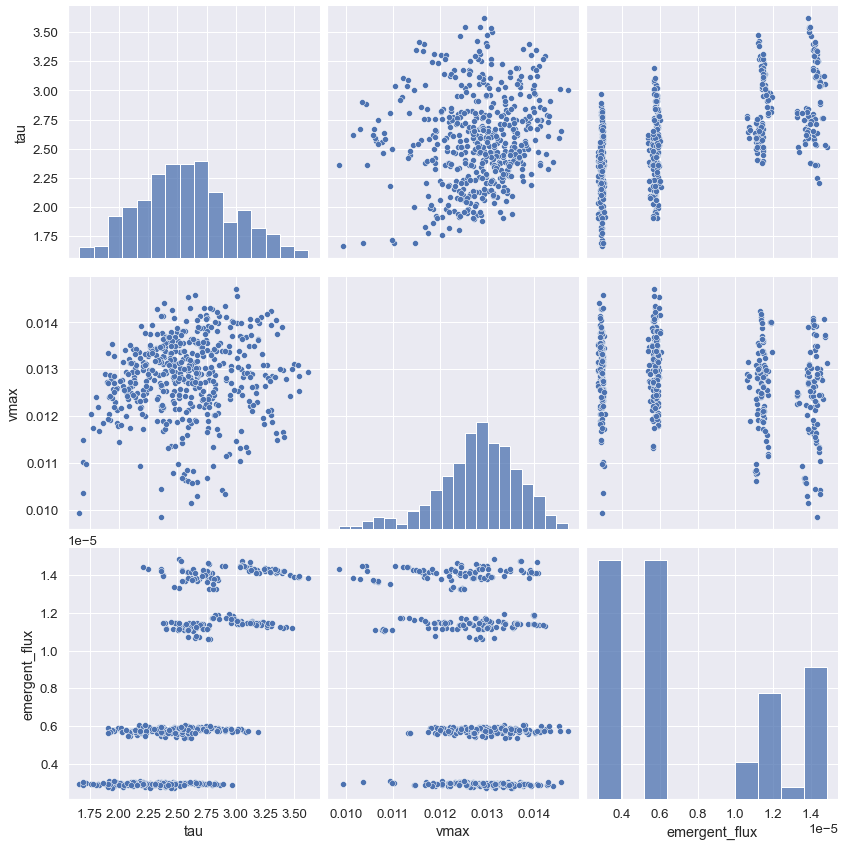

In [30]:
sns.pairplot(obs_df.loc[:, ~obs_df.columns.isin(['tau_uncertainty', 'vmax_uncertainty'])], kind='scatter', height=4);
sns.set_context("notebook", font_scale=0.5) 

There's minor positive correlation between tau and the emergent flux, but it doesn't seem to be anything particularly meaningful.
Otherwise, there seems to be no linear relationship between the observable parameters.

I can't seem to find any other links between the observable parameters, so I'll move on to step 2.

<hr / style="border:0; height:1px;">

<h2><ins>Step 2</ins></h2>
<font size="3">Identifying relationships between the observable and physical parameters</font>

Before analysing the relationships between the observable and physical parameters, I'll begin with exploring the physical parameters.

In [32]:
phys_df.head()

,total_mass,mass_nickel56,explosion_energy,initial_mass_distribution_flag,initial_nickel56_distribution_flag
0,1.00,0.15,2.00,mwd,w7dt
1,2.00,0.75,2.00,mwd,N100
2,0.75,0.15,2.00,N100,w7dt
3,1.40,0.60,2.00,mwd,w7dt
4,1.80,0.60,0.75,hed8,w7dt


From this preview of the data, it can be seen that the numerical data of the physical parameters are all likely discrete. I'll verify this by viewing the count of distinct values in each column.

In [37]:
for param in phys_params:
    print(phys_df[param].value_counts())

2.00    128
1.40    128
1.80    128
1.00     64
0.75     64
Name: total_mass, dtype: int64
0.15    160
0.30    160
0.75     96
0.60     96
Name: mass_nickel56, dtype: int64
2.00    256
0.75    256
Name: explosion_energy, dtype: int64
mwd     128
N100    128
hed8    128
w7dt    128
Name: initial_mass_distribution_flag, dtype: int64
w7dt    128
N100    128
mwd     128
hed8    128
Name: initial_nickel56_distribution_flag, dtype: int64


As expected, the data are indeed discrete.
<br>
The total mass, mass nickel-56, explosion energy, initial mass distribution flag and initial nickel-56 distribution flag are split into 4, 4, 2, 4, and 4 groups respectively. This should make validation simpler since there are distinct outputs associated to the inputs. 
<br><br>
I'll now visualize the frequency that each of these groups occur for each variable using histograms.

In [177]:
def frequency_histogram(param, fig, ax):
    ax.set_xlabel(param, fontsize=15)
    ax.set_ylabel("Frequency", fontsize=15)
    frequency_table = df[param].value_counts()
    # to make matplotlib treat the discrete numerical data as categorical data, 
    # I convert the indexes to strings.
    frequency_table_indexes = [str(index) for index in sorted(frequency_table.index)]
    frequency_table = (frequency_table_indexes, list(frequency_table.values))
    ax.tick_params(axis='both', which='major', labelsize=12)
    return ax.bar(frequency_table[0], frequency_table[1], color='steelblue', edgecolor='black', linewidth=0.3)

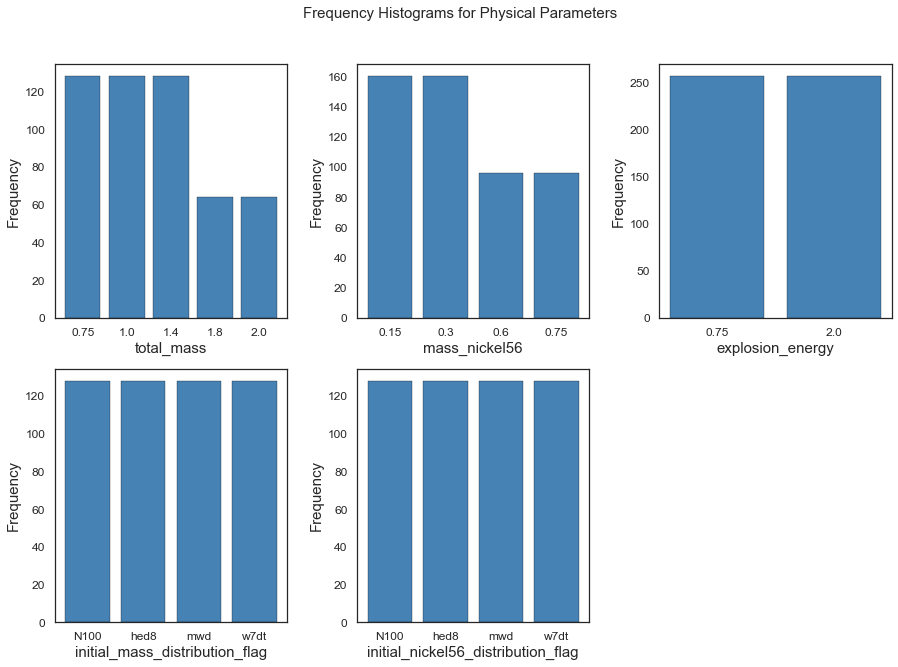

In [178]:
fig = plt.figure(figsize=(15, 10))
title = fig.suptitle("Frequency Histograms for Physical Parameters", fontsize=15)
fig.subplots_adjust(wspace=0.3, hspace=0.2, top=0.90)

for plot_position, param in enumerate(phys_params, start=1):
    ax = fig.add_subplot(2, 3, plot_position)
    frequency_histogram(param, fig, ax)
    

The frequency histograms reveal that there is some imbalance in the representation of total mass of progenitor systems, with there being fewer systems containing a mass above 1.4$M_\odot$; there's also an imbalance in the representation of systems based on their mass <sup>56</sup>Ni – there are fewer samples whose mass <sup>56</sup>Ni is above 0.3$M_\odot$.

The next step is to find some relationship between the observable and physical parameters.
<br>
I'll begin by creating a heat map of correlations between the numerical variables.

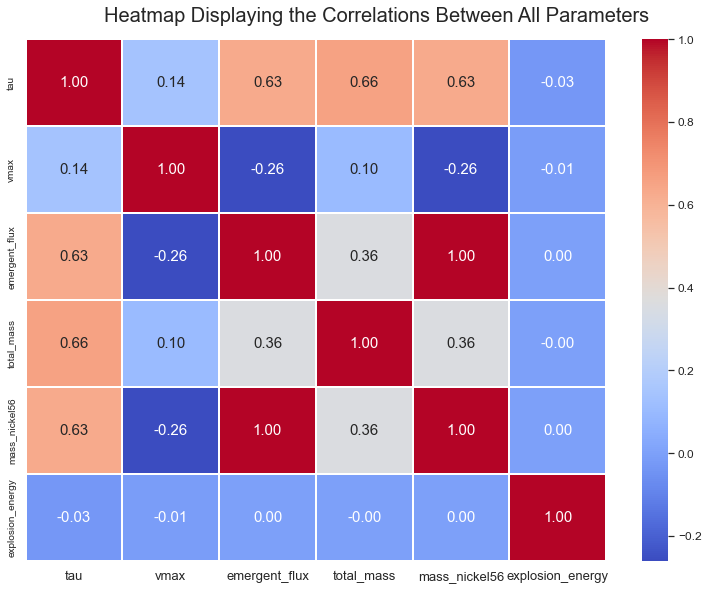

In [179]:
corr_table = df.loc[:, ~df.columns.isin(uncertainty_params)].corr()
fig, ax = plt.subplots(figsize=(13, 9))
fig.suptitle("Heatmap Displaying the Correlations Between All Parameters", fontsize=20)
fig.subplots_adjust(top=0.93)

cmap = sns.color_palette("coolwarm", as_cmap=True)
heat_map = sns.heatmap(round(corr_table, 2), annot=True, annot_kws={"fontsize": 15},
                       ax=ax, cmap=cmap, linewidths=0.05, fmt='.2f')
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=10)
cbar = heat_map.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)



There's a perfect correlation between emergent flux and mass <sup>56</sup>Ni as well as a moderate positive correlation between tau and the total mass of the progenitor system; the former is certainly worth exploring further.

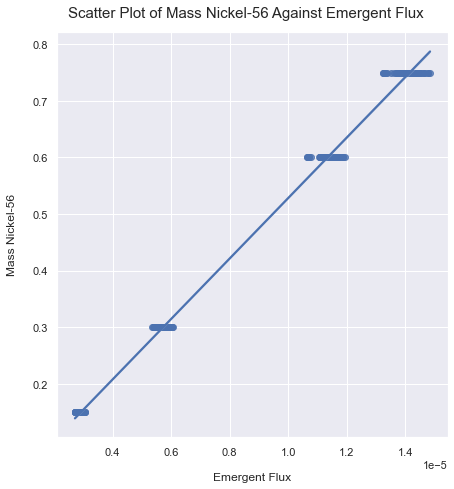

In [242]:
fig, ax = plt.subplots(figsize=(7, 7))
fig.suptitle("Scatter Plot of Mass Nickel-56 Against Emergent Flux", fontsize=15)
fig.subplots_adjust(top = 0.93)

regplot = sns.regplot(x=df["emergent_flux"], y=df["mass_nickel56"], ax=ax)
regplot.set_xlabel("Emergent Flux", fontsize=12)
regplot.xaxis.labelpad = 15
regplot.yaxis.labelpad = 15
regplot.set_ylabel("Mass Nickel-56", fontsize= 12);

As expected, we get a perfect positive linear relationship between emergent flux and mass nickel-56. Not only that, but because emergent flux seems to generally occur in such a narrow bands, determining the mass nickel-56 given the emergent flux should be trivial.

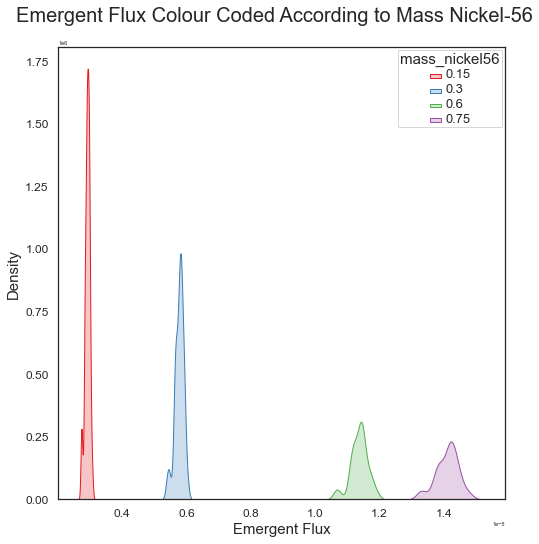

In [205]:
fig, ax = plt.subplots(figsize=(8, 8))
fig.suptitle("Emergent Flux Colour Coded According to Mass Nickel-56", fontsize=20)
fig.subplots_adjust(top=0.91)

palette = sns.color_palette("Set1", 4)
distplot = sns.kdeplot(x=df["emergent_flux"],palette=palette, ax=ax, hue=df["mass_nickel56"], fill=True)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_xlabel("Emergent Flux", fontsize=15)
ax.set_ylabel("Density", fontsize=15)

plt.setp(distplot.get_legend().get_texts(), fontsize=13)
plt.setp(distplot.get_legend().get_title(), fontsize=15);

The colour coded distribution of emergent flux makes it very easy to see that discrete masses of <sup>56</sup>Ni result in particular energies of emergent flux. Moreover, they're also perfectly linearly correlated which implies that the higher the mass <sup>56</sup>Ni present in the progenitor system, the higher the energy of the emergent flux 300 days post-explosion.

<AxesSubplot:xlabel='tau', ylabel='total_mass'>

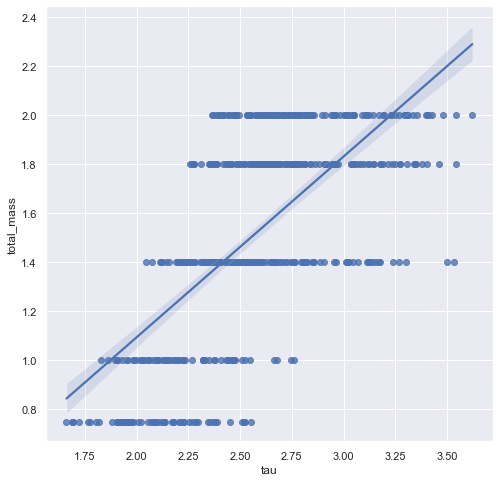

In [247]:
sns.regplot(x=df["tau"], y=df["total_mass"], fit_reg=True)

<AxesSubplot:xlabel='tau', ylabel='mass_nickel56'>

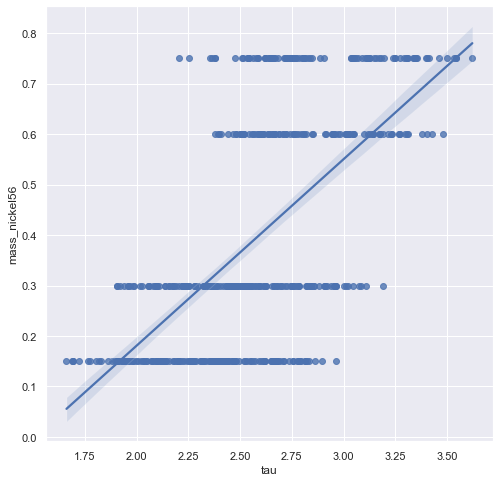

In [248]:
sns.regplot(x=df["tau"], y=df["mass_nickel56"])

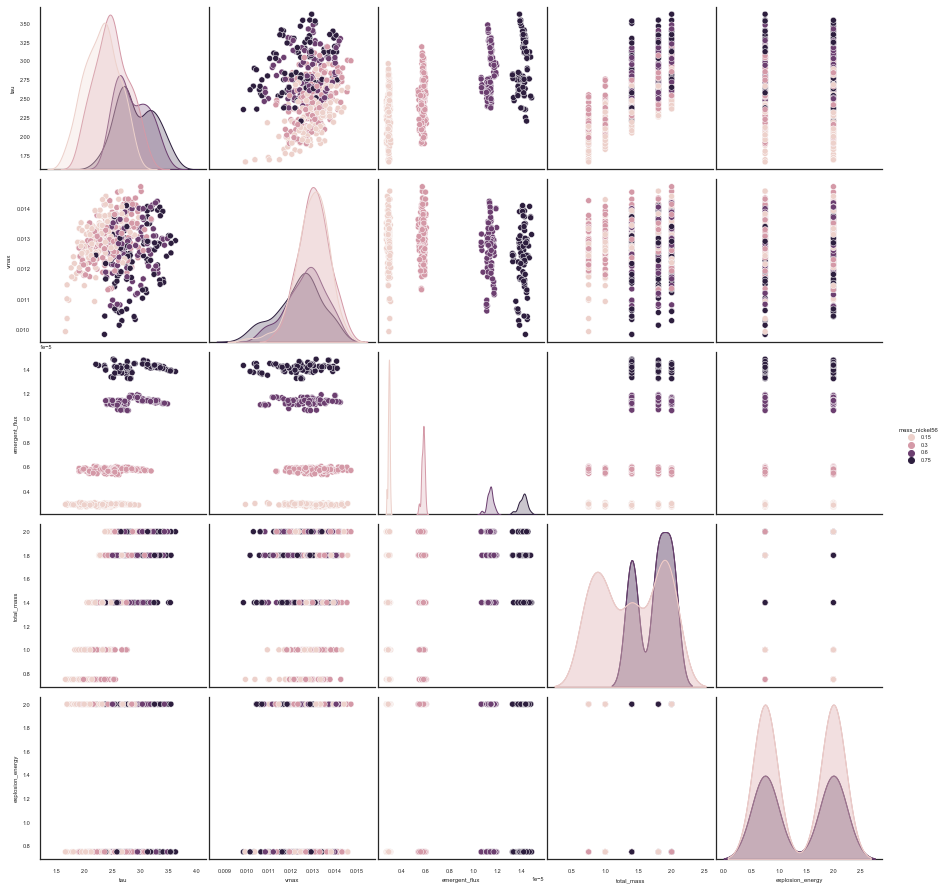

In [73]:
sns.pairplot(df.loc[:, ~df.columns.isin(uncertainty_params)], hue="mass_nickel56")

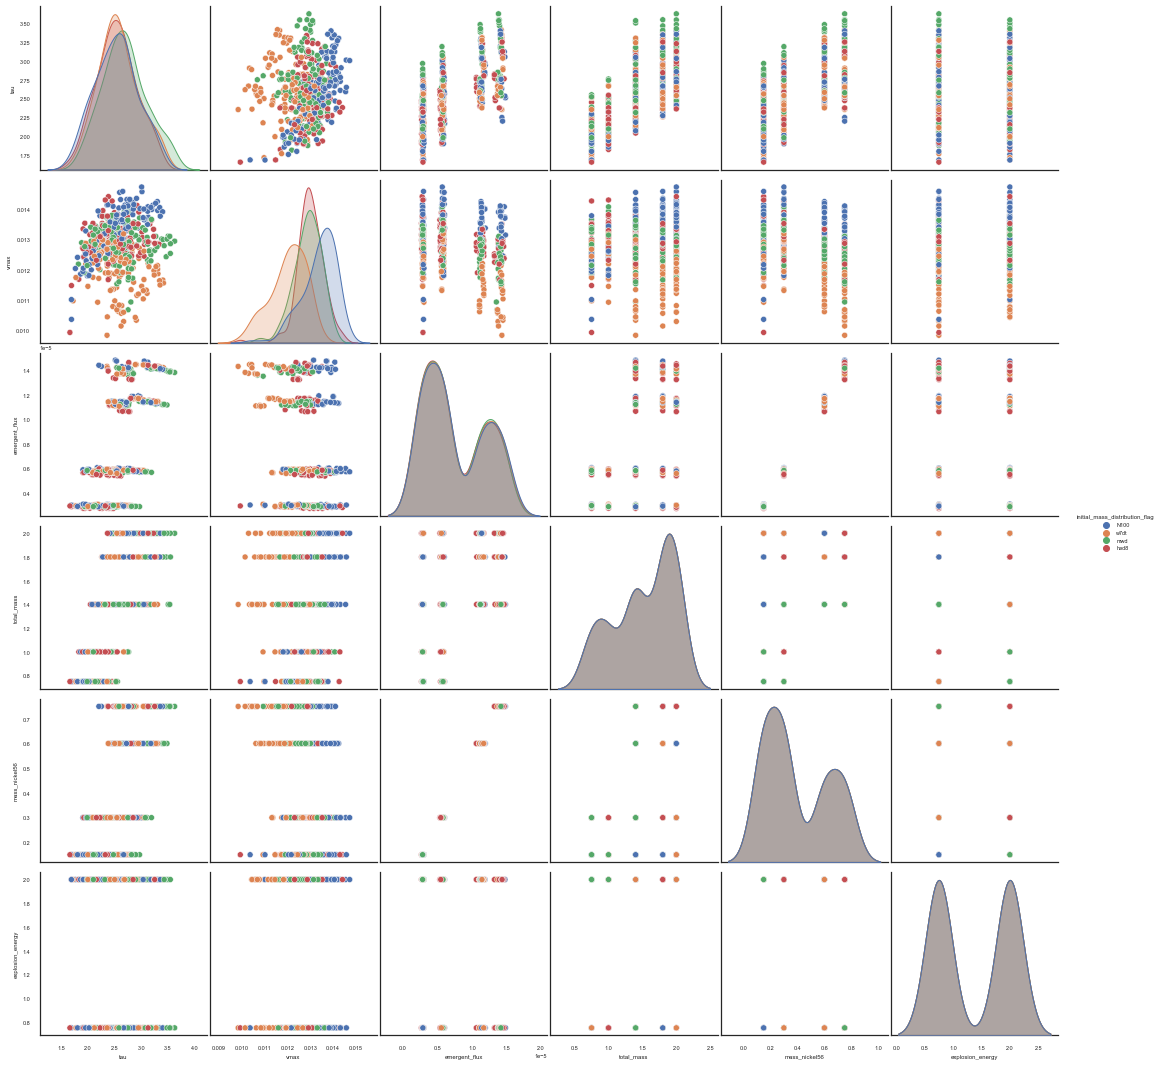

In [127]:
sns.pairplot(df.loc[:, ~df.columns.isin(uncertainty_params)], hue="initial_mass_distribution_flag")

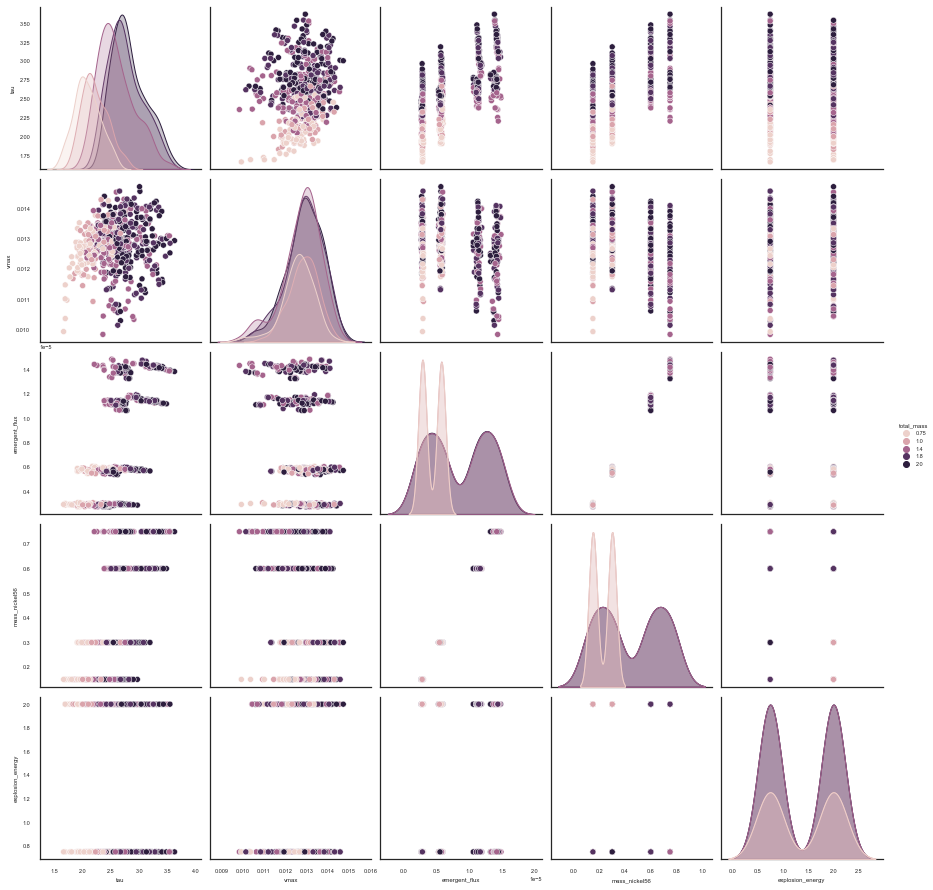

In [74]:
sns.pairplot(df.loc[:, ~df.columns.isin(uncertainty_params)], hue="total_mass")

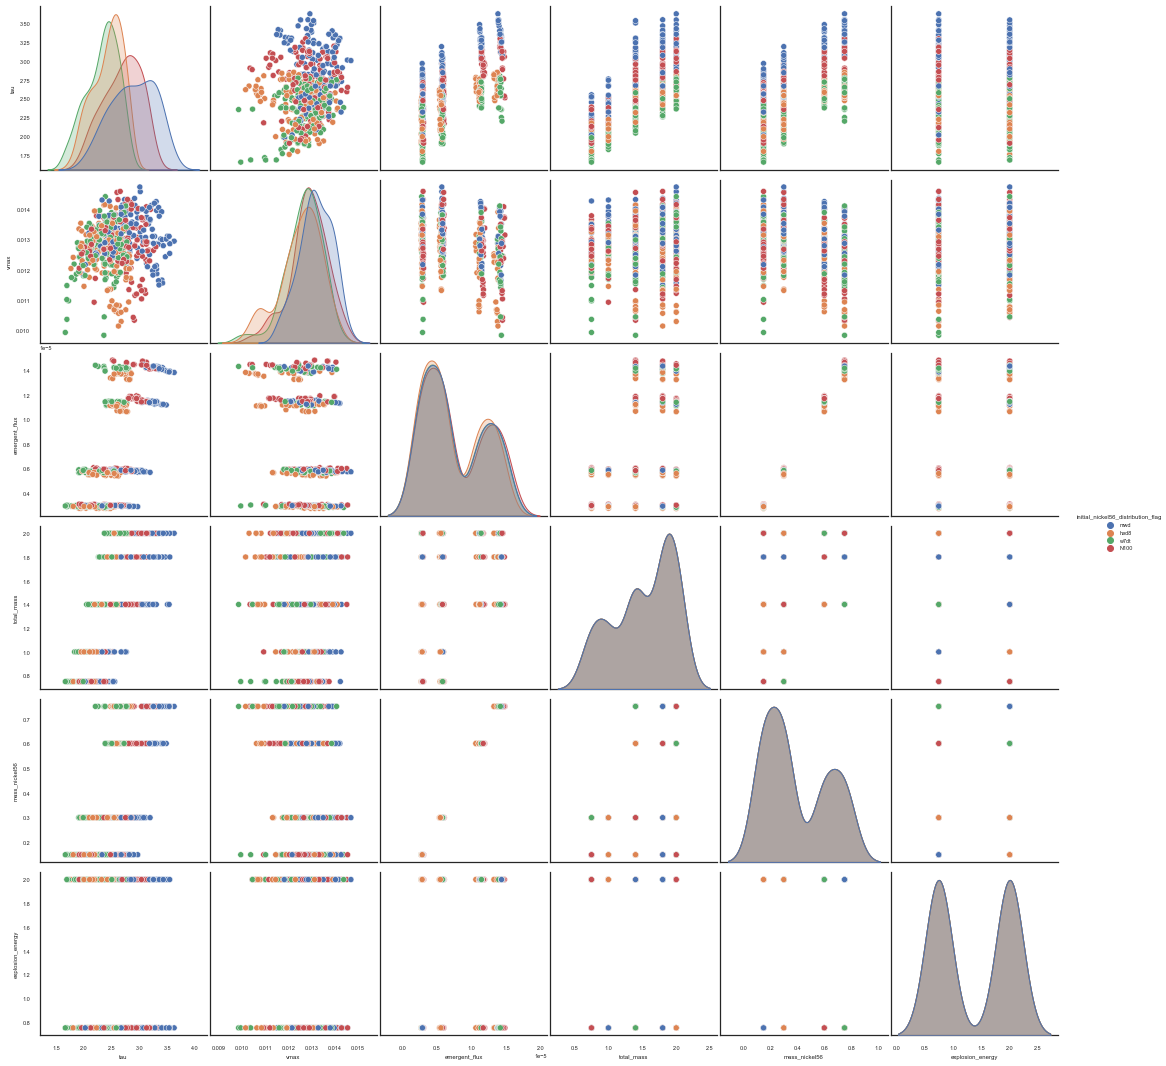

In [77]:
sns.pairplot(df.loc[:, ~df.columns.isin(uncertainty_params)], hue="initial_nickel56_distribution_flag")